# Import Libraries

pip install -r requirements.txt ; use this command in the terminal to install the required packages

In [72]:
import pandas as pd 
# import numpy as np 
# import sklearn as sk 
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [21]:
RANDOM_STATE = 1437

# Data

* Based on the following Four input features
* We need to cluster them into different groups and 
* Recommend the marketing team on which individual to focus

In [22]:
data = pd.read_csv('Mall_Customers.csv',index_col=[0]) # setting the customerID column as the index column
data

,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


No data preprocessing - Outlier removal, Scaling/Normalization, Missing Values, Duplicates has been done.

In [23]:
train_data,test_data = train_test_split(data,test_size=0.1,random_state=RANDOM_STATE)
train_data

,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
CustomerID,,,,
93,Male,48,60,49
8,Female,23,18,94
145,Male,25,77,12
142,Male,32,75,93
90,Female,50,58,46
...,...,...,...,...
39,Female,36,37,26
30,Female,23,29,87
141,Female,57,75,5


# Clustering K-means Model

## First, we have to find the no.of clusters

In [24]:
# within cluster sum of squares-wcss, 
# lower this value meaning the groups have been further separated from others
wcss = [] 

train_data_x = train_data.iloc[:,2:].values  
# lets check for groups from 1 to 15
k_values = 15
for clusters in range(1,k_values):
    ## Inititating the model
    kmeans = KMeans(
        n_clusters=clusters,
        init='k-means++',
        random_state=RANDOM_STATE
    )
    
    ## Training the model with the data by using fit method 
    kmeans.fit(train_data_x)
    wcss.append(kmeans.inertia_)
    

## Visualizing the WCSS by ELBOW method to find the optimal value of K

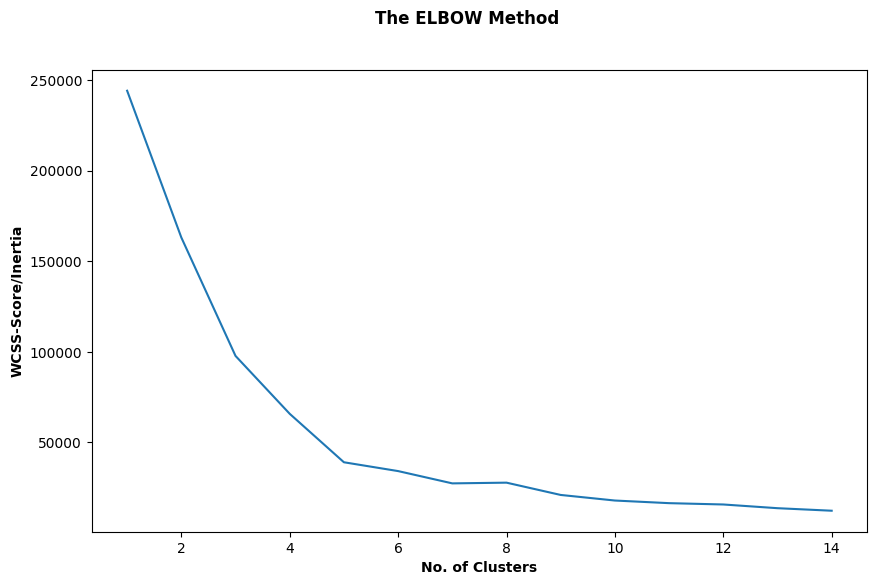

In [53]:
f, ax = plt.subplots(figsize=(10,6))
plt.plot(range(1,k_values), wcss)
plt.suptitle('The ELBOW Method',weight='bold')
plt.xlabel('No. of Clusters',weight='bold')
plt.ylabel('WCSS-Score/Inertia',weight='bold')
# plt.title('** The Y value the lower the better')
plt.show()

* From the above plot, we can take K as anywhere between 4 and 6 

## Final K-Means Model

In [69]:
final_noof_cluster=6
k_means_model = KMeans(n_clusters=final_noof_cluster,init='k-means++',random_state=RANDOM_STATE)
k_means_model.fit(train_data_x)
k_means_model

KMeans(n_clusters=6, random_state=1437)

In [70]:
train_data_clusters = k_means_model.predict(train_data_x)
train_data['clusters'] = train_data_clusters.tolist()

## Visualizing the Clusters

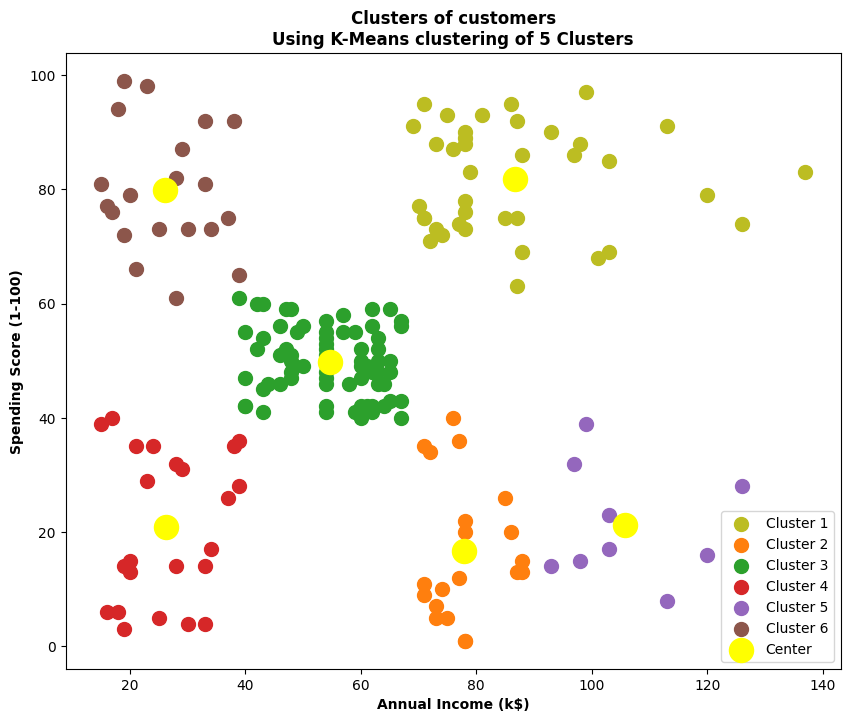

['#1f77b4',
 '#bcbd22',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#17becf']

In [71]:

colors_list = ['#1f77b4','#bcbd22',  '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#17becf'] # mcolors.TABLEAU_COLORS
fig, ax = plt.subplots(figsize=(10,8))
for clustr in range(1,final_noof_cluster+1):
    CLUS = clustr-1
    plt.scatter(train_data[train_data.clusters==CLUS]['Annual_Income_(k$)'], train_data[train_data.clusters==CLUS]['Spending_Score_(1-100)'], s=100, c=colors_list[clustr],label=f'Cluster {clustr}')

plt.scatter(k_means_model.cluster_centers_[:,0], k_means_model.cluster_centers_[:,1], s=300,c='yellow',label='Center')
plt.title('Clusters of customers\nUsing K-Means clustering of 5 Clusters', weight='bold')
plt.xlabel('Annual Income (k$)', weight='bold')
plt.ylabel('Spending Score (1-100)', weight='bold')

plt.legend()
plt.show()

colors_list


## Prediciting on unseen data

In [ ]:
test_x = test_data.iloc[:,2:].values
test_data_clusters = k_means_model.predict(test_x)
test_data_clusters

array([1, 1, 1, 4, 4, 1, 4, 2, 1, 4, 1, 4, 1, 0, 2, 4, 4, 1, 4, 1])